In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Things to note
Teams are not specified by group_id, but instead are a combination of group_id and implementation. i.e team 2a, 2b, 3c etc.

## What to do 
- Find important stats for each group, each implementation and each true team
- Run models on true teams

In [2]:
df = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = 'unicode_escape')

df.head()

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


Create a new column that contains the true team name and cut out unecessary columns

In [3]:
df['team'] = df['group_id'].astype(str) + df['implementation']
df = df.drop(['Unnamed: 0','Line_ID','ChatGroup','content','RoleName','roomName','wordCount'],axis=1)

df.head()

,userIDs,implementation,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,team
0,1,a,2,0,0,0,0,0,0,4,2a
1,1,a,2,0,0,0,0,0,0,4,2a
2,1,a,2,0,0,0,0,0,0,4,2a
3,1,a,2,0,0,0,1,0,0,4,2a
4,1,a,2,0,0,0,0,0,0,4,2a


### Data frame seperated by group_id
Drop irrelevant columns and group by group_id

In [4]:
groupdf = df.drop(['userIDs','OutcomeScore'],axis=1)
groupdf = groupdf.groupby(['group_id'], axis=0).sum()

groupdf

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
group_id,,,,,,
2,109,401,743,71,220,86
3,67,382,729,95,190,84
4,161,415,783,64,209,83
5,117,407,660,64,183,74
6,97,368,672,54,200,77


Loop through original dataset to find averages

In [5]:
avgScore = []
std = []
for group in range(2,7):
    tempdf = df[df['group_id'] == group]
    avgScore.append(np.round(tempdf['OutcomeScore'].mean(),2))
    std.append(np.round(tempdf['OutcomeScore'].std(),2))

groupdf['avgScore'] = avgScore
groupdf['std'] = std

groupdf

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,avgScore,std
group_id,,,,,,,,
2,109,401,743,71,220,86,3.47,1.36
3,67,382,729,95,190,84,3.71,1.65
4,161,415,783,64,209,83,3.80,1.51
5,117,407,660,64,183,74,4.08,1.28
6,97,368,672,54,200,77,3.68,1.42


### Data frame seperated by implementation

In [6]:
implementdf = df.drop(['userIDs','OutcomeScore','group_id'],axis=1)
implementdf = implementdf.groupby(['implementation'], axis=0).sum()

implementdf

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
implementation,,,,,,
a,50,163,250,19,95,42
b,40,111,234,24,65,42
c,40,163,375,18,88,48
d,42,155,331,21,57,25
e,23,143,232,24,56,38
f,24,124,241,29,87,36
g,27,96,158,19,57,18
h,23,116,213,12,44,24
i,57,140,321,34,64,21


In [7]:
avgScore = []
std = []
for implementation in df['implementation'].unique():
    tempdf = df[df['implementation'] == implementation]
    avgScore.append(np.round(tempdf['OutcomeScore'].mean(),2))
    std.append(np.round(tempdf['OutcomeScore'].std(),2))

implementdf['avgScore'] = avgScore
implementdf['std'] = std

implementdf.head()

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,avgScore,std
implementation,,,,,,,,
a,50,163,250,19,95,42,3.04,1.39
b,40,111,234,24,65,42,3.65,0.82
c,40,163,375,18,88,48,3.35,1.31
d,42,155,331,21,57,25,3.38,1.44
e,23,143,232,24,56,38,3.95,1.26


### Data frame seperated by team

In [8]:
teamdf = df.drop(['userIDs','OutcomeScore','group_id'],axis=1)
teamdf = teamdf.groupby(['team'], axis=0).sum()

teamdf.head()

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
team,,,,,,
2a,11,30,64,3,23,7
2b,3,29,36,4,10,6
2c,9,38,107,9,29,12
2d,7,31,51,4,9,4
2e,1,8,35,4,8,5


In [42]:
avgScore = []
std = []
for team in df['team'].unique():
    tempdf = df[df['team'] == team]
    avgScore.append(np.round(tempdf['OutcomeScore'].mean(),2))
    std.append(np.round(tempdf['OutcomeScore'].std(),2))

teamdf['avgScore'] = avgScore
teamdf['std'] = std

teamdf.head()

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,avgScore,std
team,,,,,,,,
2a,11,30,64,3,23,7,3.65,0.98
2b,3,29,36,4,10,6,3.72,0.85
2c,9,38,107,9,29,12,2.53,1.84
2d,7,31,51,4,9,4,2.91,1.45
2e,1,8,35,4,8,5,2.51,0.97


In [10]:
teamdf.describe()

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,avgScore,std
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,7.346667,26.306667,47.826667,4.640000,13.360000,5.386667,3.748000,1.170133
std,6.715237,9.074725,22.065243,3.245121,5.757815,3.316190,0.718822,0.548002
min,0.000000,8.000000,7.000000,0.000000,1.000000,0.000000,2.230000,0.000000
25%,2.500000,20.000000,34.000000,2.500000,9.000000,3.000000,3.360000,0.760000
50%,6.000000,26.000000,45.000000,4.000000,13.000000,5.000000,3.750000,1.080000
75%,9.500000,31.000000,60.500000,6.000000,16.500000,7.000000,4.105000,1.505000
max,33.000000,55.000000,117.000000,17.000000,30.000000,18.000000,5.600000,2.510000


Looking at group and implementation team-level statistics is fairly unremarkable. Avg scores are roughly the same and so is standard deviation. However, when looking at teams there is a bit more variance. Team 4k scored highest with an average of 5.6 and 3c got lowest with 2.23

## Models
Models will only be tested on true teams due to lack of data points in the other 2 data frames

In [39]:
X = teamdf.drop(['avgScore','std'],axis=1)
y = teamdf['avgScore']

nX = (X-X.mean())/X.std()

### Linear regression:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

training_score = lr.score(X_train,y_train)
preds_lr = lr.predict(X_test)
rsquared_lr = r2_score(y_test, preds_lr)

print("Training score is",round(training_score,4))
print("Testing score is",round(rsquared_lr,4))

Training score is 0.486
Testing score is -8.5651


Poor training score, negative testing score? Normalising data has no effect

### Decision tree classifiers:

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

teamdf['avgScore'] = np.round(teamdf['avgScore'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

Decision tree accuracy: 0.47


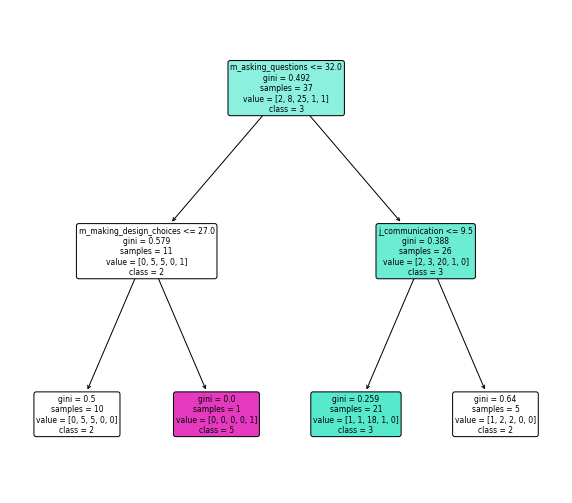

In [36]:
teamdf_dtc = DecisionTreeClassifier(max_depth = 2, random_state=123)
teamdf_dtc = teamdf_dtc.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(10,9))
plot_tree(teamdf_dtc,
         filled = True,
         rounded = True,
         class_names = ['1','2','3','4','5','6','7','8'],
         feature_names = X.columns);

y_pred = teamdf_dtc.predict(X_test)
print("Decision tree accuracy:", np.round(accuracy_score(y_pred,y_test),2))